In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

import seaborn as sns 

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix, f1_score
from imblearn.under_sampling import RandomUnderSampler


pd.set_option('display.max_rows', 500)

# Load Data file

In [2]:
# Read the pickle file
with open('../data/instacart_data.pkl', 'rb') as pickle_in:
    df = pickle.load(pickle_in)

In [3]:
df.head()

,user_product,department,user_id,product_id,times_ordered,total_orders,pct_reorder,min_days_bet,max_days_bet,avg_days_bet,...,last5_total_orders,last5_pct_order,min_days_5odrs,max_days_5odrs,avg_days_5odrs,min_reorder_5days,max_reorder_5days,avg_reorder_5days,avg_items_ordered,last5_avg_items
0,1-196,beverages,1,196,10,10,1.0,0.0,30.0,19.0,...,5.0,1.0,0.0,30.0,16.0,0.0,30.0,16.0,5.0,6.0
1,1-10258,snacks,1,10258,9,10,0.9,0.0,30.0,19.0,...,5.0,1.0,0.0,30.0,16.0,0.0,30.0,16.0,5.0,6.0
2,1-10326,produce,1,10326,1,10,0.1,0.0,30.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0
3,1-12427,snacks,1,12427,10,10,1.0,0.0,30.0,19.0,...,5.0,1.0,0.0,30.0,16.0,0.0,30.0,16.0,5.0,6.0
4,1-13032,breakfast,1,13032,3,10,0.3,0.0,30.0,19.0,...,5.0,0.4,0.0,30.0,16.0,44.0,44.0,44.0,5.0,6.0


In [68]:
# Drop user_id and product_id columns
df.drop(columns=['user_id', 'product_id'], axis=1, inplace=True)

In [69]:
# Set the index to user_product
df.set_index('user_product', inplace=True)

In [70]:
df.head(2)

,department,times_ordered,total_orders,pct_reorder,min_days_bet,max_days_bet,avg_days_bet,min_reorder_days,max_reorder_days,avg_reorder_days,...,last5_total_orders,last5_pct_order,min_days_5odrs,max_days_5odrs,avg_days_5odrs,min_reorder_5days,max_reorder_5days,avg_reorder_5days,avg_items_ordered,last5_avg_items
user_product,,,,,,,,,,,,,,,,,,,,,
130210-10467,canned goods,2,13,0.153846,2.0,12.0,5.538462,28.0,28.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0
204138-1405,snacks,1,6,0.166667,3.0,30.0,23.166667,0.0,0.0,0.0,...,5.0,0.2,3.0,30.0,21.0,0.0,0.0,0.0,7.0,7.0


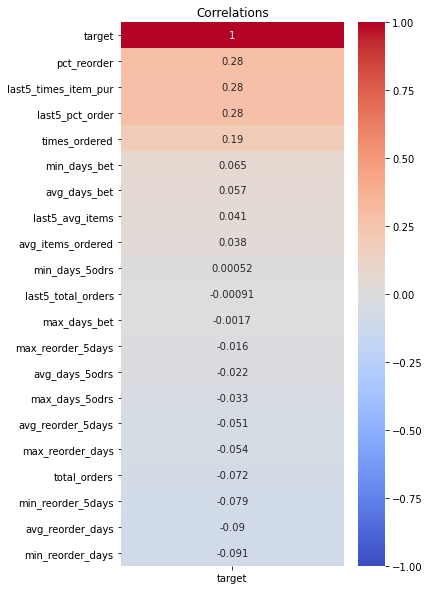

In [4]:
plt.figure(figsize = (5, 10))
corr = df.drop(columns = ['user_id', 'product_id']).corr()
sns.heatmap(corr[['target']].sort_values('target', ascending = False), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True )
plt.title('Correlations');

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13307953 entries, 0 to 13307952
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   user_product          object 
 1   department            object 
 2   user_id               int64  
 3   product_id            int64  
 4   times_ordered         int64  
 5   total_orders          int64  
 6   pct_reorder           float64
 7   min_days_bet          float64
 8   max_days_bet          float64
 9   avg_days_bet          float64
 10  min_reorder_days      float64
 11  max_reorder_days      float64
 12  avg_reorder_days      float64
 13  target                int64  
 14  last5_times_item_pur  float64
 15  last5_total_orders    float64
 16  last5_pct_order       float64
 17  min_days_5odrs        float64
 18  max_days_5odrs        float64
 19  avg_days_5odrs        float64
 20  min_reorder_5days     float64
 21  max_reorder_5days     float64
 22  avg_reorder_5days     float64
 23  avg_i

In [6]:
df.isnull().sum()

user_product                   0
department                     0
user_id                        0
product_id                     0
times_ordered                  0
total_orders                   0
pct_reorder                    0
min_days_bet                   0
max_days_bet                   0
avg_days_bet                   0
min_reorder_days         7982695
max_reorder_days         7982695
avg_reorder_days         7982695
target                         0
last5_times_item_pur     6593708
last5_total_orders       6593708
last5_pct_order          6593708
min_days_5odrs           6593708
max_days_5odrs           6593708
avg_days_5odrs           6593708
min_reorder_5days       11370213
max_reorder_5days       11370213
avg_reorder_5days       11370213
avg_items_ordered              0
last5_avg_items                0
dtype: int64

In [7]:
# Replace all NaN values with 0
df = df.replace(np.nan, 0)

In [8]:
df.isnull().sum()

user_product            0
department              0
user_id                 0
product_id              0
times_ordered           0
total_orders            0
pct_reorder             0
min_days_bet            0
max_days_bet            0
avg_days_bet            0
min_reorder_days        0
max_reorder_days        0
avg_reorder_days        0
target                  0
last5_times_item_pur    0
last5_total_orders      0
last5_pct_order         0
min_days_5odrs          0
max_days_5odrs          0
avg_days_5odrs          0
min_reorder_5days       0
max_reorder_5days       0
avg_reorder_5days       0
avg_items_ordered       0
last5_avg_items         0
dtype: int64

In [9]:
df.columns

Index(['user_product', 'department', 'user_id', 'product_id', 'times_ordered',
       'total_orders', 'pct_reorder', 'min_days_bet', 'max_days_bet',
       'avg_days_bet', 'min_reorder_days', 'max_reorder_days',
       'avg_reorder_days', 'target', 'last5_times_item_pur',
       'last5_total_orders', 'last5_pct_order', 'min_days_5odrs',
       'max_days_5odrs', 'avg_days_5odrs', 'min_reorder_5days',
       'max_reorder_5days', 'avg_reorder_5days', 'avg_items_ordered',
       'last5_avg_items'],
      dtype='object')

In [66]:
# Set up the features to for modeling

In [10]:
features = ['times_ordered',
       'total_orders', 'pct_reorder', 'min_days_bet', 'max_days_bet',
       'avg_days_bet', 'min_reorder_days', 'max_reorder_days',
       'avg_reorder_days', 'last5_times_item_pur',
       'last5_total_orders', 'last5_pct_order', 'min_days_5odrs',
       'max_days_5odrs', 'avg_days_5odrs', 'min_reorder_5days',
       'max_reorder_5days', 'avg_reorder_5days', 'avg_items_ordered',
       'last5_avg_items']

In [11]:
features2 = ['pct_reorder', 'min_days_bet', 'max_days_bet',
       'avg_days_bet', 'min_reorder_days', 'max_reorder_days',
       'avg_reorder_days', 'last5_pct_order', 'min_days_5odrs',
       'max_days_5odrs', 'avg_days_5odrs', 'min_reorder_5days',
       'max_reorder_5days', 'avg_reorder_5days', 'avg_items_ordered',
       'last5_avg_items', 'department']

In [12]:
features3 = ['pct_reorder', 'last5_pct_order', 'min_days_5odrs',
       'max_days_5odrs', 'avg_days_5odrs', 'min_reorder_5days',
       'max_reorder_5days', 'avg_reorder_5days',
       'last5_avg_items', 'department']

In [11]:
df.describe()

,user_id,product_id,times_ordered,total_orders,pct_reorder,min_days_bet,max_days_bet,avg_days_bet,min_reorder_days,max_reorder_days,...,last5_total_orders,last5_pct_order,min_days_5odrs,max_days_5odrs,avg_days_5odrs,min_reorder_5days,max_reorder_5days,avg_reorder_5days,avg_items_ordered,last5_avg_items
count,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,...,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07
mean,1.029987e+05,2.551351e+04,2.437226e+00,2.538019e+01,1.542015e-01,3.776690e+00,2.657565e+01,1.283433e+01,1.236982e+01,2.433866e+01,...,2.398653e+00,1.579592e-01,4.098218e+00,1.131039e+01,7.676283e+00,2.883439e+00,3.670918e+00,3.267203e+00,1.224318e+01,1.276982e+01
std,5.943677e+04,1.422429e+04,3.554528e+00,2.228080e+01,1.645884e-01,5.102299e+00,6.102046e+00,6.399232e+00,3.141338e+01,4.499039e+01,...,2.413698e+00,2.042882e-01,6.502440e+00,1.287494e+01,9.270063e+00,9.673783e+00,1.120417e+01,1.022962e+01,6.307086e+00,7.022815e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.010101e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.157900e+04,1.329200e+04,1.000000e+00,9.000000e+00,4.545455e-02,1.000000e+00,2.500000e+01,7.714286e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00
50%,1.027130e+05,2.564000e+04,1.000000e+00,1.800000e+01,9.615385e-02,2.000000e+00,3.000000e+01,1.175000e+01,0.000000e+00,0.000000e+00,...,3.000000e+00,2.000000e-01,0.000000e+00,4.000000e+00,2.250000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01
75%,1.544500e+05,3.815700e+04,2.000000e+00,3.500000e+01,2.000000e-01,5.000000e+00,3.000000e+01,1.714286e+01,9.000000e+00,3.000000e+01,...,5.000000e+00,2.000000e-01,6.000000e+00,2.900000e+01,1.475000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,1.600000e+01
max,2.062090e+05,4.968800e+04,9.900000e+01,9.900000e+01,1.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,3.650000e+02,3.650000e+02,...,5.000000e+00,1.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,1.200000e+02,1.200000e+02,1.200000e+02,7.000000e+01,8.400000e+01


In [ ]:
df['target'].value_counts(normalize=True)

# Set up the data for training

In [13]:
df = df.sample(500000)

In [14]:
df['target'].value_counts()

0    468998
1     31002
Name: target, dtype: int64

In [14]:
X = df[features]
y = df['target']

In [17]:
df['target'].value_counts(normalize=True)

0    0.937996
1    0.062004
Name: target, dtype: float64

# Scale the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size =0.2, stratify =y)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [8]:
df['target'].value_counts()

0    12479129
1      828824
Name: target, dtype: int64

In [16]:
log = LogisticRegression()
log.fit(X_train_sc, y_train)

LogisticRegression()

In [ ]:
# The model is predicing all values as '0' - imbalance dataset

In [17]:
log.score(X_train_sc, y_train), log.score(X_test_sc, y_test)

(0.9371475, 0.93771)

In [18]:
preds_log = log.predict(X_test_sc)
preds_log

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
# Function to Print the metrics
def metrics(y_test, y_predict):
    print('Accuracy score %s ' % accuracy_score(y_test, y_predict), '\n')
    print('----------------------------------------------------------------')
    print(pd.DataFrame(confusion_matrix(y_test, y_predict), 
                            index=['Not R', 'Reordered'], 
                            columns=['Not R', 'Reordered']), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_test, y_predict))
    print('-----------------------------------------------------------------')

In [27]:
metrics(y_test, preds_log)

Accuracy score 0.93716  

----------------------------------------------------------------
           Not R  Reordered
Not R      93456        266
Reordered   6018        260 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     93722
           1       0.49      0.04      0.08      6278

    accuracy                           0.94    100000
   macro avg       0.72      0.52      0.52    100000
weighted avg       0.91      0.94      0.91    100000

-----------------------------------------------------------------


# Let's create some synthetic data with SMOTE¶


In [21]:
sm = SMOTE()

Xsm_train, ysm_train = sm.fit_sample(X_train_sc, y_train)


In [22]:
print(pd.Series(ysm_train).value_counts())


1    374932
0    374932
Name: target, dtype: int64


# Modeling with all numeric features

# Best Model: LogisticRegression Model

In [23]:
lr = LogisticRegression()
lr.fit(Xsm_train, ysm_train)


LogisticRegression()

In [24]:
lr.score(Xsm_train, ysm_train), lr.score(X_test_sc, y_test)


(0.7113489912837528, 0.73571)

In [25]:
preds = lr.predict(X_test_sc)
preds

array([1, 0, 1, ..., 1, 1, 0])

In [26]:
metrics(y_test, preds)

Accuracy score 0.73571  

----------------------------------------------------------------
           Not R  Reordered
Not R      69249      24484
Reordered   1945       4322 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     93733
           1       0.15      0.69      0.25      6267

    accuracy                           0.74    100000
   macro avg       0.56      0.71      0.54    100000
weighted avg       0.92      0.74      0.80    100000

-----------------------------------------------------------------


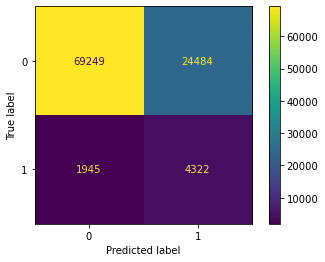

In [32]:
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

plot_confusion_matrix(lr, X_test_sc, y_test, cmap='viridis', values_format='d');

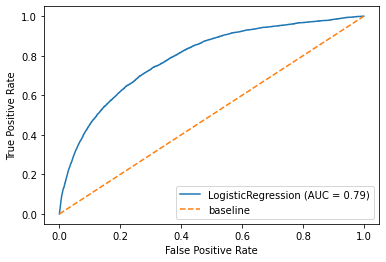

In [63]:
# Import metrics.
from sklearn import metrics

# ROC curve
metrics.plot_roc_curve(lr, X_test_sc, y_test)

# add worst case scenario line
plt.plot([0, 1], [0, 1], label = 'baseline', linestyle = '--')

# add a legend
plt.legend();

In [33]:
# Calculate sensitivity / recall. pos % correct when actually true

sens =tp / (tp + fn)
print(f'Sensitivity: {round(sens, 4)}')

# Calculate specificity. % correct when actually false

spec = tn / (tn + fp)
print(f'Specificity: {round(spec, 4)}')

Sensitivity: 0.6896
Specificity: 0.7388


# Other Models generated

In [28]:
# K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(Xsm_train, ysm_train)

#accuracy scor: train, test
model_knn.score(Xsm_train, ysm_train), model_knn.score(X_test_sc, y_test)


(0.919068629673991, 0.77717)

In [29]:
# Get preditions and validate our model
preds_knn = model_knn.predict(X_test_sc)

metrics(y_test, preds_knn)

Accuracy score 0.77717  

----------------------------------------------------------------
            None  Reordered
None       74730      18987
Reordered   3296       2987 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     93717
           1       0.14      0.48      0.21      6283

    accuracy                           0.78    100000
   macro avg       0.55      0.64      0.54    100000
weighted avg       0.91      0.78      0.83    100000

-----------------------------------------------------------------


In [22]:
# Decision Tree Classifiers/Random Forests
model_dt = DecisionTreeClassifier()
model_dt.fit(Xsm_train, ysm_train)

model_dt.score(Xsm_train, ysm_train), model_dt.score(X_test_sc, y_test)


(0.9928917531543345, 0.88989)

In [30]:
# Get preditions and validate our model
preds_dt = model_dt.predict(X_test_sc)

metrics(y_test, preds_dt)


Accuracy score 0.88989  

----------------------------------------------------------------
            None  Reordered
None       87728       6072
Reordered   4939       1261 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     93800
           1       0.17      0.20      0.19      6200

    accuracy                           0.89    100000
   macro avg       0.56      0.57      0.56    100000
weighted avg       0.90      0.89      0.89    100000

-----------------------------------------------------------------


In [33]:
# Random Forest Classifiers/Random Forests
model_rf = RandomForestClassifier()
model_rf.fit(Xsm_train, ysm_train)

model_rf.score(Xsm_train, ysm_train), model_rf.score(X_test_sc, y_test)


(0.9928890878949248, 0.91967)

In [35]:
# Get preditions and validate our model
preds_rf = model_rf.predict(X_test_sc)

metrics(y_test, preds_rf)


Accuracy score 0.91967  

----------------------------------------------------------------
            None  Reordered
None       90915       2885
Reordered   5148       1052 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     93800
           1       0.27      0.17      0.21      6200

    accuracy                           0.92    100000
   macro avg       0.61      0.57      0.58    100000
weighted avg       0.90      0.92      0.91    100000

-----------------------------------------------------------------


In [36]:
# Ada Boost
model_ada = AdaBoostClassifier()
model_ada.fit(Xsm_train, ysm_train)

model_ada.score(Xsm_train, ysm_train), model_ada.score(X_test_sc, y_test)


(0.7745750243871236, 0.81623)

In [37]:
# Get preditions and validate our model
preds_ada = model_ada.predict(X_test_sc)

metrics(y_test, preds_ada)


Accuracy score 0.81623  

----------------------------------------------------------------
            None  Reordered
None       78072      15728
Reordered   2649       3551 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     93800
           1       0.18      0.57      0.28      6200

    accuracy                           0.82    100000
   macro avg       0.58      0.70      0.59    100000
weighted avg       0.92      0.82      0.86    100000

-----------------------------------------------------------------


In [38]:
# BaggingClassifier
model_bag = BaggingClassifier()
model_bag.fit(Xsm_train, ysm_train)

model_bag.score(Xsm_train, ysm_train), model_bag.score(X_test_sc, y_test)


(0.9902264937446361, 0.91922)

In [39]:
# Get preditions and validate our model
preds_bag = model_bag.predict(X_test_sc)

metrics(y_test, preds_bag)

Accuracy score 0.91922  

----------------------------------------------------------------
            None  Reordered
None       91148       2652
Reordered   5426        774 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     93800
           1       0.23      0.12      0.16      6200

    accuracy                           0.92    100000
   macro avg       0.58      0.55      0.56    100000
weighted avg       0.90      0.92      0.91    100000

-----------------------------------------------------------------


In [63]:
print(f1_score(y_test, preds_bag))

0.16081446083523787


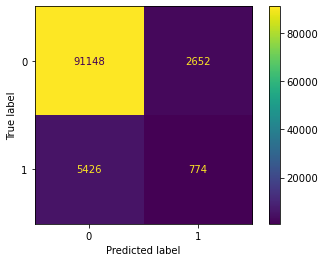

In [64]:
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_bag).ravel()

plot_confusion_matrix(model_bag, X_test_sc, y_test, cmap='viridis', values_format='d');

In [56]:
# Calculate sensitivity / recall. pos % correct when actually true

sens =tp / (tp + fn)
print(f'Sensitivity: {round(sens, 4)}')

# Calculate specificity. % correct when actually false

spec = tn / (tn + fp)
print(f'Specificity: {round(spec, 4)}')

Sensitivity: 0.1248
Specificity: 0.9717


# Add Departments

In [35]:
X = df[features2]
y = df['target']

In [36]:
X = pd.get_dummies(X, columns=['department'], drop_first=True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size =0.2, stratify =y)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [38]:
sm = SMOTE()

Xsm_train, ysm_train = sm.fit_sample(X_train_sc, y_train)

print(pd.Series(ysm_train).value_counts())


1    374932
0    374932
Name: target, dtype: int64


In [39]:
lr = LogisticRegression()
lr.fit(Xsm_train, ysm_train)

lr.score(Xsm_train, ysm_train), lr.score(X_test_sc, y_test)

/Users/paulettewarrick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.713798768843417, 0.75128)

In [40]:
preds = lr.predict(X_test_sc)
metrics(y_test, preds)

Accuracy score 0.75128  

----------------------------------------------------------------
           Not R  Reordered
Not R      70891      22842
Reordered   2030       4237 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     93733
           1       0.16      0.68      0.25      6267

    accuracy                           0.75    100000
   macro avg       0.56      0.72      0.55    100000
weighted avg       0.92      0.75      0.81    100000

-----------------------------------------------------------------


In [41]:
# Decision Tree Classifiers/Random Forests
model_dt = DecisionTreeClassifier()
model_dt.fit(Xsm_train, ysm_train)

model_dt.score(Xsm_train, ysm_train), model_dt.score(X_test_sc, y_test)

(0.9981823370637876, 0.88335)

In [42]:
# Get preditions and validate our model
preds_dt = model_dt.predict(X_test_sc)

metrics(y_test, preds_dt)


Accuracy score 0.88335  

----------------------------------------------------------------
           Not R  Reordered
Not R      87029       6704
Reordered   4961       1306 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     93733
           1       0.16      0.21      0.18      6267

    accuracy                           0.88    100000
   macro avg       0.55      0.57      0.56    100000
weighted avg       0.90      0.88      0.89    100000

-----------------------------------------------------------------


In [43]:
# Random Forest Classifiers/Random Forests
model_rf = RandomForestClassifier()
model_rf.fit(Xsm_train, ysm_train)

model_rf.score(Xsm_train, ysm_train), model_rf.score(X_test_sc, y_test)

(0.9981810034886326, 0.92302)

In [44]:
# Get preditions and validate our model
preds_rf = model_rf.predict(X_test_sc)

metrics(y_test, preds_rf)

Accuracy score 0.92302  

----------------------------------------------------------------
           Not R  Reordered
Not R      91212       2521
Reordered   5177       1090 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     93733
           1       0.30      0.17      0.22      6267

    accuracy                           0.92    100000
   macro avg       0.62      0.57      0.59    100000
weighted avg       0.91      0.92      0.91    100000

-----------------------------------------------------------------


In [45]:
# Ada Boost
model_ada = AdaBoostClassifier()
model_ada.fit(Xsm_train, ysm_train)

model_ada.score(Xsm_train, ysm_train), model_ada.score(X_test_sc, y_test)


(0.7956176053257658, 0.78079)

In [46]:
# Get preditions and validate our model
preds_ada = model_ada.predict(X_test_sc)

metrics(y_test, preds_ada)

Accuracy score 0.78079  

----------------------------------------------------------------
           Not R  Reordered
Not R      74327      19406
Reordered   2515       3752 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     93733
           1       0.16      0.60      0.26      6267

    accuracy                           0.78    100000
   macro avg       0.56      0.70      0.56    100000
weighted avg       0.92      0.78      0.83    100000

-----------------------------------------------------------------


In [47]:
# BaggingClassifier
model_bag = BaggingClassifier()
model_bag.fit(Xsm_train, ysm_train)

model_bag.score(Xsm_train, ysm_train), model_bag.score(X_test_sc, y_test)

(0.9946270257006604, 0.92348)

In [48]:
# Get preditions and validate our model
preds_bag = model_bag.predict(X_test_sc)

metrics(y_test, preds_bag)

Accuracy score 0.92348  

----------------------------------------------------------------
           Not R  Reordered
Not R      91657       2076
Reordered   5576        691 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     93733
           1       0.25      0.11      0.15      6267

    accuracy                           0.92    100000
   macro avg       0.60      0.54      0.56    100000
weighted avg       0.90      0.92      0.91    100000

-----------------------------------------------------------------


# Remove aggregate features including all orders

In [49]:
X = df[features3]
y = df['target']

In [50]:
X = pd.get_dummies(X, columns=['department'], drop_first=True)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size =0.2, stratify =y)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [52]:
sm = SMOTE()

Xsm_train, ysm_train = sm.fit_sample(X_train_sc, y_train)

print(pd.Series(ysm_train).value_counts())

1    374932
0    374932
Name: target, dtype: int64


In [53]:
lr = LogisticRegression()
lr.fit(Xsm_train, ysm_train)

lr.score(Xsm_train, ysm_train), lr.score(X_test_sc, y_test)

(0.711339656257668, 0.75617)

In [54]:
preds = lr.predict(X_test_sc)
metrics(y_test, preds)

Accuracy score 0.75617  

----------------------------------------------------------------
           Not R  Reordered
Not R      71459      22274
Reordered   2109       4158 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     93733
           1       0.16      0.66      0.25      6267

    accuracy                           0.76    100000
   macro avg       0.56      0.71      0.55    100000
weighted avg       0.92      0.76      0.82    100000

-----------------------------------------------------------------


In [55]:
# Decision Tree Classifiers/Random Forests
model_dt = DecisionTreeClassifier()
model_dt.fit(Xsm_train, ysm_train)

model_dt.score(Xsm_train, ysm_train), model_dt.score(X_test_sc, y_test)

(0.9893353994857734, 0.88782)

In [56]:
# Get preditions and validate our model
preds_dt = model_dt.predict(X_test_sc)

metrics(y_test, preds_dt)


Accuracy score 0.88782  

----------------------------------------------------------------
           Not R  Reordered
Not R      87500       6233
Reordered   4985       1282 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     93733
           1       0.17      0.20      0.19      6267

    accuracy                           0.89    100000
   macro avg       0.56      0.57      0.56    100000
weighted avg       0.90      0.89      0.89    100000

-----------------------------------------------------------------


In [57]:
# Random Forest Classifiers/Random Forests
model_rf = RandomForestClassifier()
model_rf.fit(Xsm_train, ysm_train)

model_rf.score(Xsm_train, ysm_train), model_rf.score(X_test_sc, y_test)

(0.9893273980348436, 0.9026)

In [58]:
# Get preditions and validate our model
preds_rf = model_rf.predict(X_test_sc)

metrics(y_test, preds_rf)

Accuracy score 0.9026  

----------------------------------------------------------------
           Not R  Reordered
Not R      89061       4672
Reordered   5068       1199 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     93733
           1       0.20      0.19      0.20      6267

    accuracy                           0.90    100000
   macro avg       0.58      0.57      0.57    100000
weighted avg       0.90      0.90      0.90    100000

-----------------------------------------------------------------


In [59]:
# Ada Boost
model_ada = AdaBoostClassifier()
model_ada.fit(Xsm_train, ysm_train)

model_ada.score(Xsm_train, ysm_train), model_ada.score(X_test_sc, y_test)


(0.746819423255417, 0.76111)

In [60]:
# Get preditions and validate our model
preds_ada = model_ada.predict(X_test_sc)

metrics(y_test, preds_ada)

Accuracy score 0.76111  

----------------------------------------------------------------
           Not R  Reordered
Not R      71999      21734
Reordered   2155       4112 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     93733
           1       0.16      0.66      0.26      6267

    accuracy                           0.76    100000
   macro avg       0.57      0.71      0.56    100000
weighted avg       0.92      0.76      0.82    100000

-----------------------------------------------------------------


In [61]:
# BaggingClassifier
model_bag = BaggingClassifier()
model_bag.fit(Xsm_train, ysm_train)

model_bag.score(Xsm_train, ysm_train), model_bag.score(X_test_sc, y_test)

(0.9858827734095783, 0.91276)

In [62]:
# Get preditions and validate our model
preds_bag = model_bag.predict(X_test_sc)

metrics(y_test, preds_bag)

Accuracy score 0.91276  

----------------------------------------------------------------
           Not R  Reordered
Not R      90428       3305
Reordered   5419        848 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     93733
           1       0.20      0.14      0.16      6267

    accuracy                           0.91    100000
   macro avg       0.57      0.55      0.56    100000
weighted avg       0.90      0.91      0.90    100000

-----------------------------------------------------------------
